In [1]:
data q1;
input Y X;
datalines;
16 4
5 1
10 2
15 3
13 3
22 4
;
run;

SAS Connection established. Subprocess id is 2300




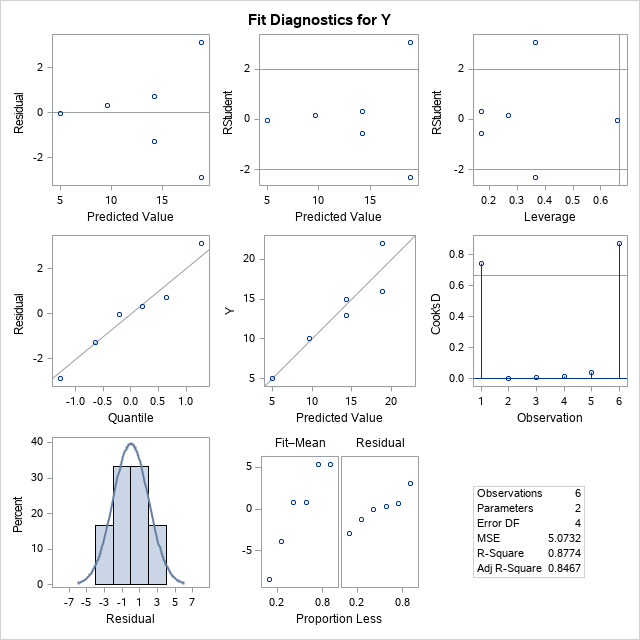
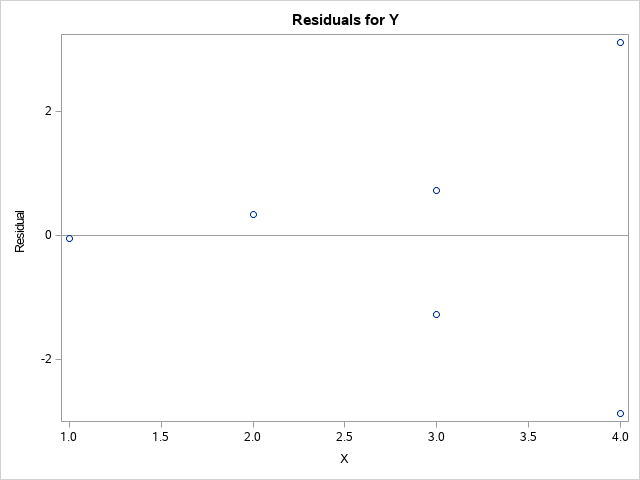
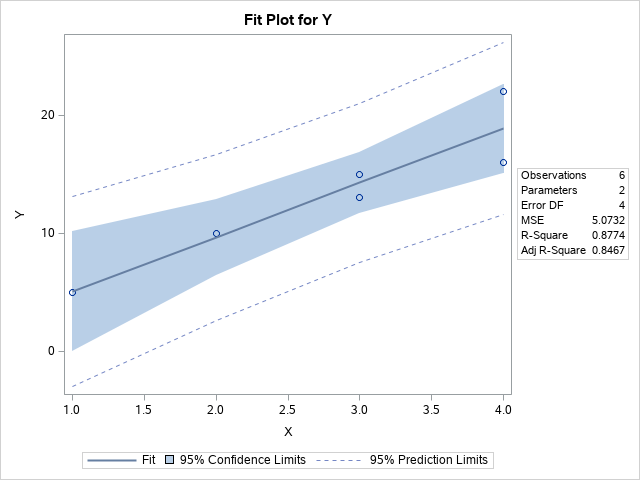

In [3]:
ods html file="\Regression\1d.htm";
proc reg data=q1;
model Y=X;
run;

___

In [4]:
proc import file="grocery.txt" out=work.q2 dbms=dlm replace;
delimiter='09'X;
getnames=no;
run;

data q2;
set q2 (rename=(VAR2=X1 VAR3=X2 VAR4=X3 VAR1=Y));
run;

In [7]:
proc print data=q2 (obs=3);
run;

Obs,Y,X1,X2,X3
1,4264,305657,7.17,0
2,4496,328476,6.2,0
3,4317,317164,4.61,0



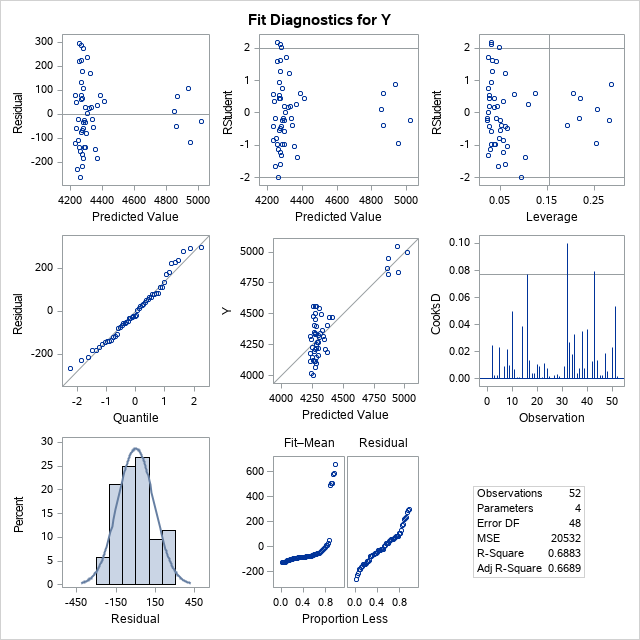
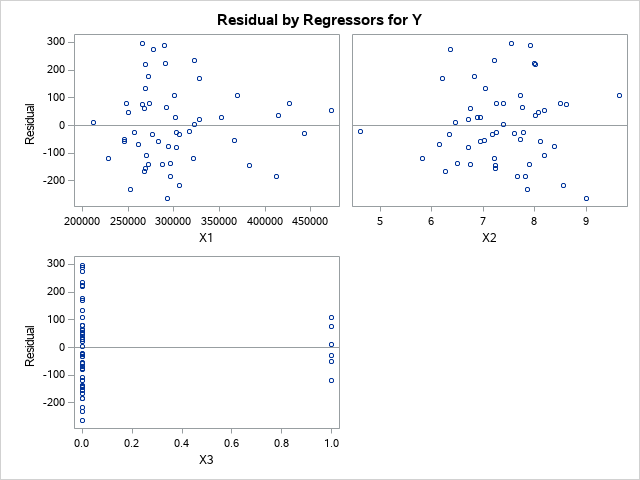

In [5]:
*ods html file = "q2_a.html";
proc reg data=q2;
model Y = X1 X2 X3;
output out=q2_a residual=yresid p=haty;
run;

In [17]:
proc print data=q2_a(obs=3);
run;

Obs,Y,X1,X2,X3,haty,yresid
1,4264,305657,7.17,0,4296.06,-32.063
2,4496,328476,6.2,0,4326.79,169.205
3,4317,317164,4.61,0,4338.83,-21.825



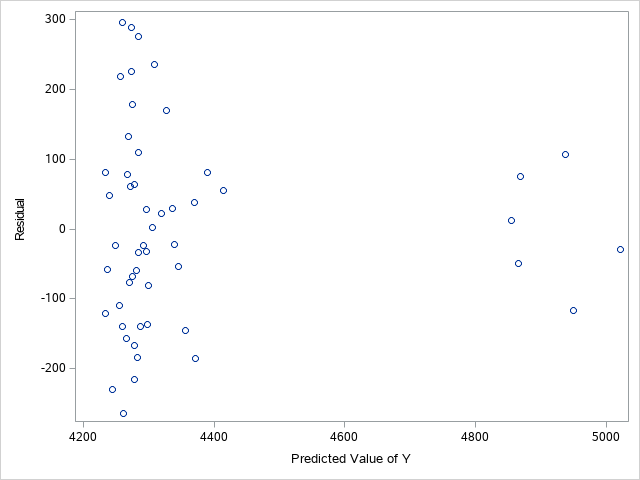
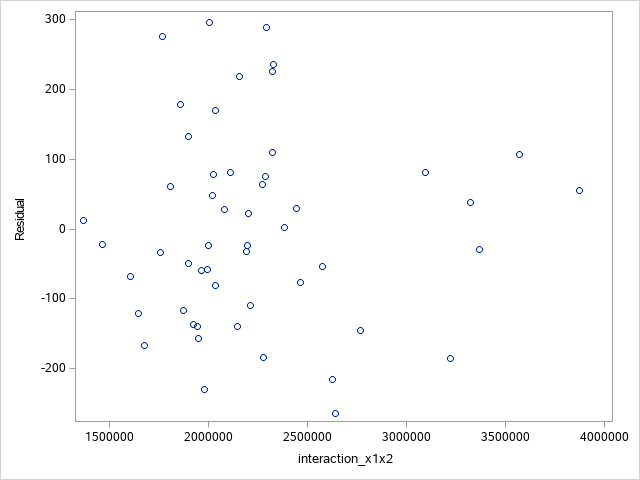

In [26]:
data q2_a;
set q2_a;
interaction_x1x2 =x1*x2;
run;
ods html file="q2_b.html";
proc sgplot data=q2_a;
scatter x=haty y = yresid; 
run;
proc sgplot data=q2_a;
scatter x=interaction_x1x2 y=yresid;
run;

___


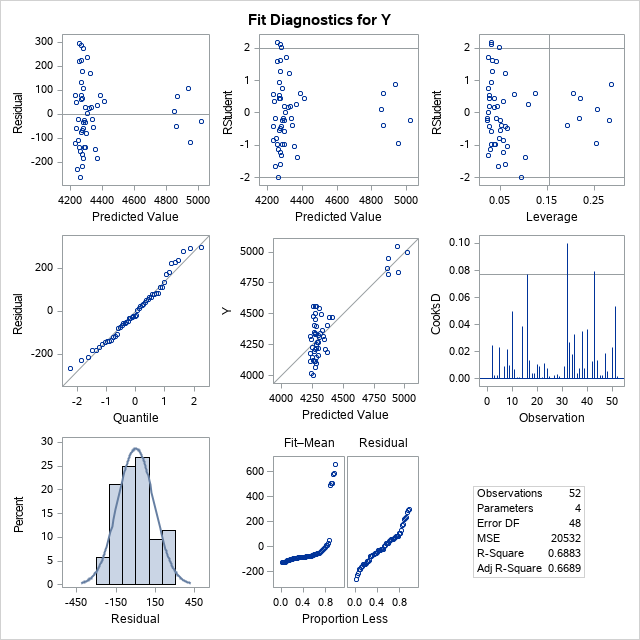
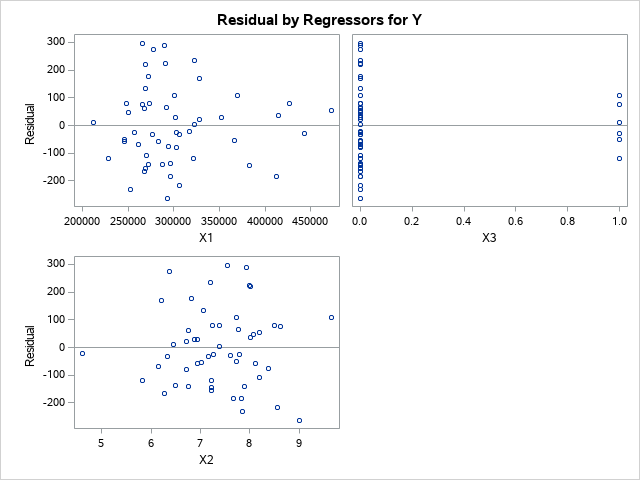

In [97]:
ods html file="hw5-q3.html";
proc reg data=q2; 
    model Y = X1 X3 X2 / ss1;
run;


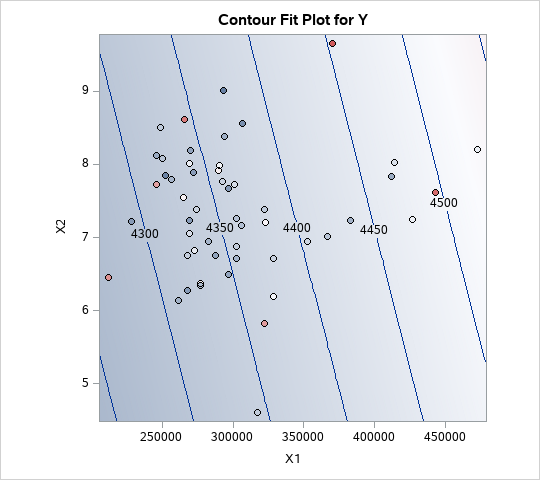

In [29]:
proc glm data=q2; 
    model Y = X1 X2 /ss1 ss2;
run;


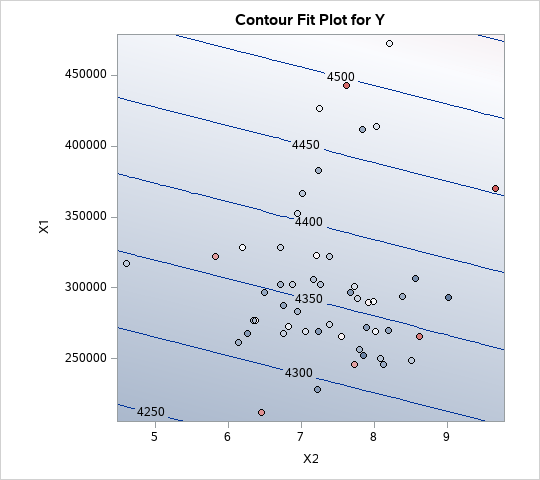

In [31]:
proc glm data=q2; 
    model Y = X2 X1 /ss1 ss2;
run;

___

In [1]:
*proc import file="c1.txt" dbms =dlm out=work.q4 replace;
data q4;
   infile 'c1.txt';
   input V1-V12;
run;

SAS Connection established. Subprocess id is 2310



In [41]:
proc print data=q4(obs=2);
run;

Obs,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
1,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60
2,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40


In [2]:
data q4;
set q4 (rename=(V4=risk V9=region V7=bed V11=nurses V12=facilities));
run;

In [3]:
proc sort data=q4 out=q4_a;
  by region;
run;


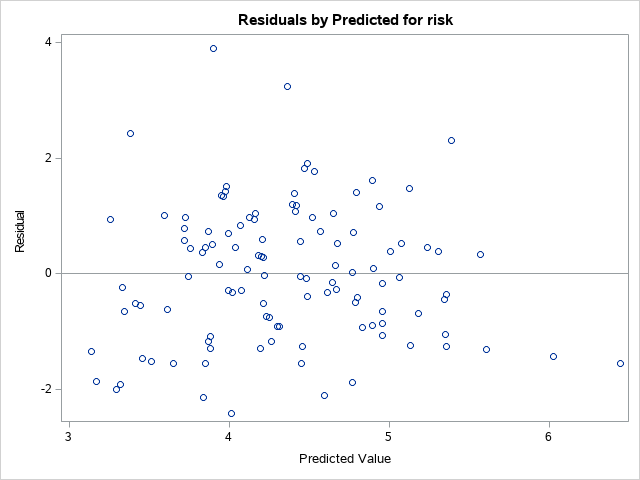
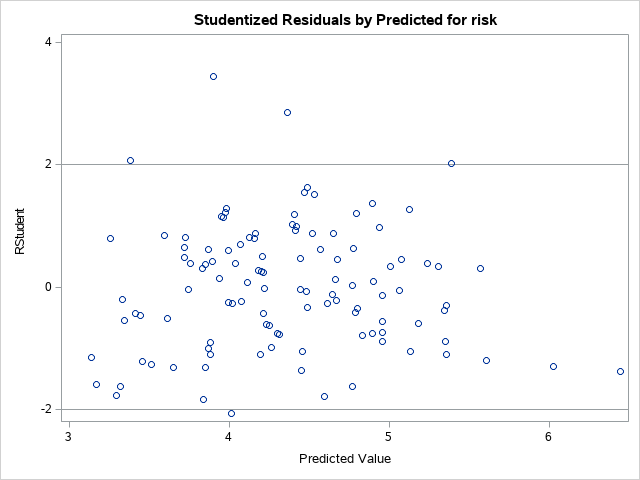
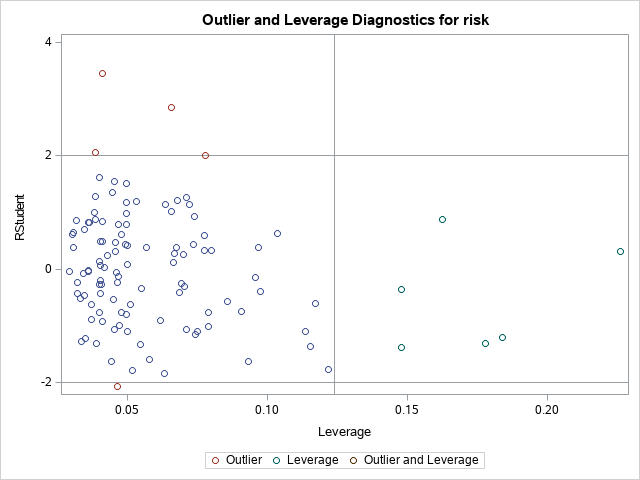
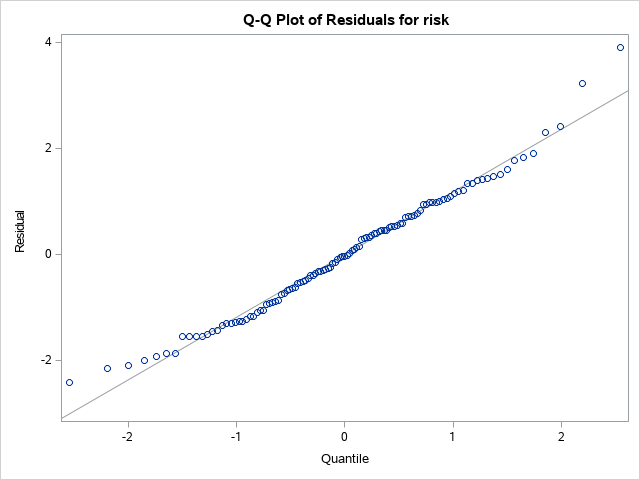
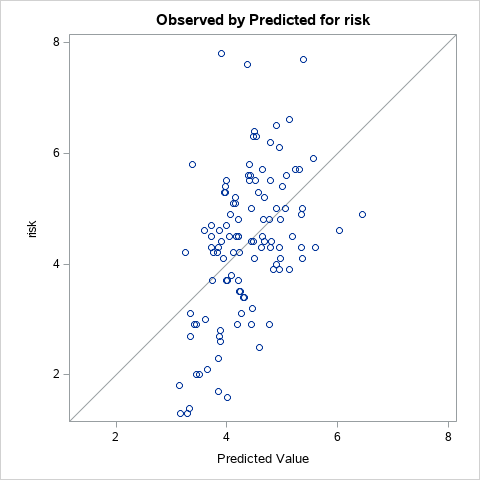
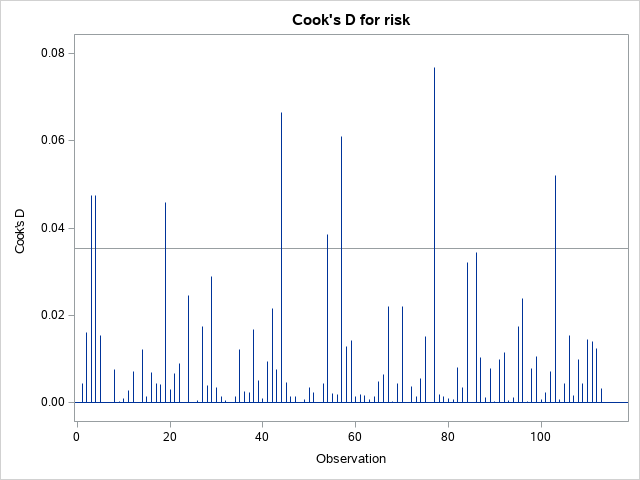
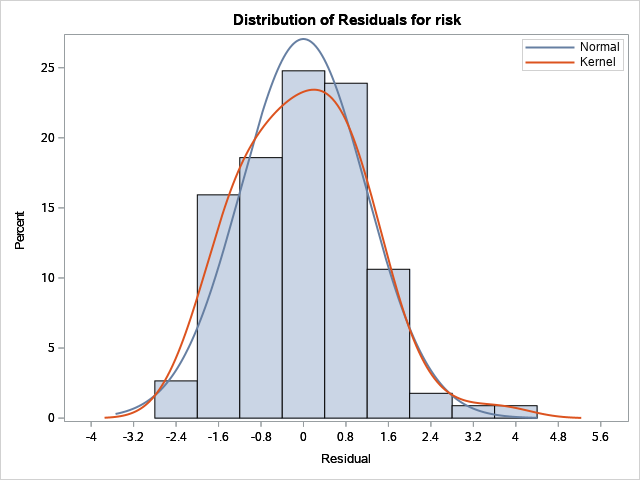
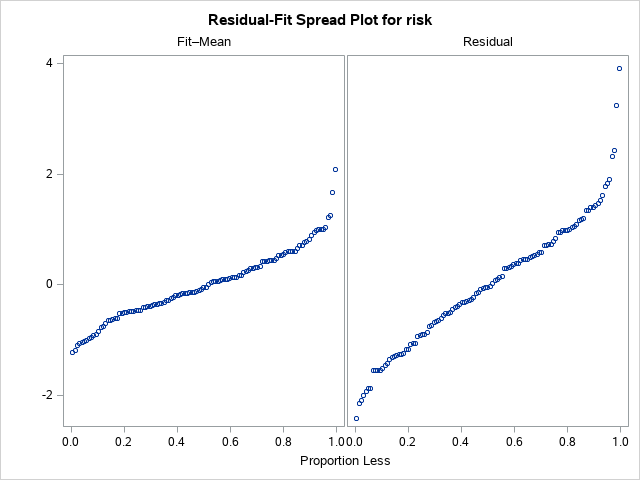

In [22]:
ods html file="new-q4-a.html";
title "first-order model of question 4";
proc glm data=q4_a PLOTS(UNPACK)=DIAGNOSTICS;
class region;
model risk = region bed nurses facilities / solution clparm;
   output out=model1output r=model1resid;
run;

In [9]:
*proc print data=model1output(obs=2);
*run;
data q4_b;
  set model1output;
  bed_nurse = bed * nurses;
  bed_facilities = bed * facilities;
  nurse_facilities = nurses * facilities;
  region_nurse = region * nurses;
  region_bed = region * bed;
  region_facilities = region * facilities;
  bed2 = bed * bed;
  nurse2 = nurses * nurses;
  facilities2=facilities * facilities;
run;



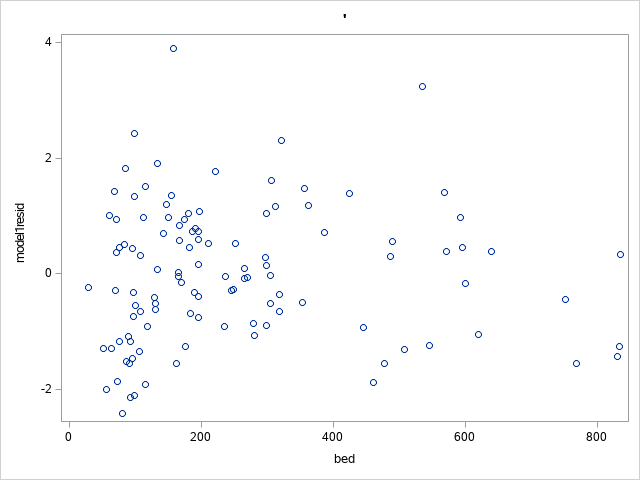

In [17]:
proc sgplot data=q4_b;
  scatter x=bed y=model1resid;
run;


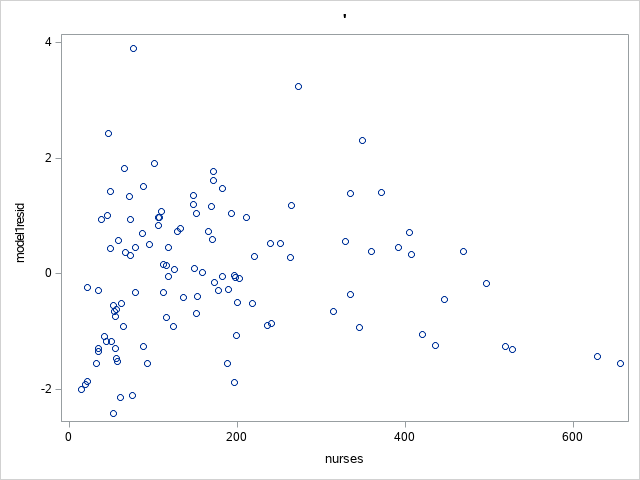

In [13]:
title "";
proc sgplot data=q4_b;
  scatter x=nurses y=model1resid;
run;


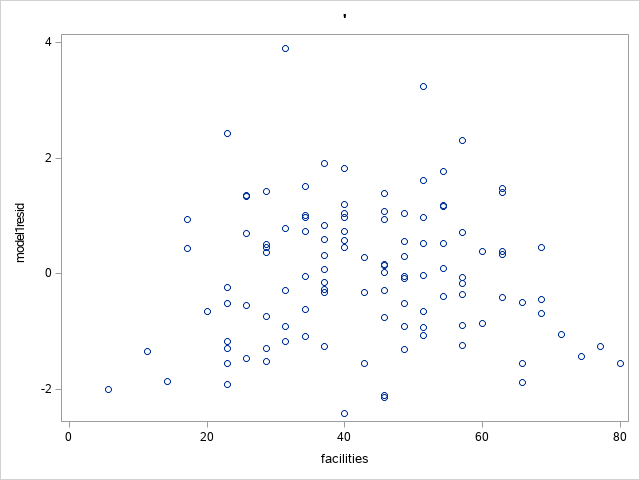

In [14]:
proc sgplot data=q4_b;
  scatter x=facilities y=model1resid;
run;


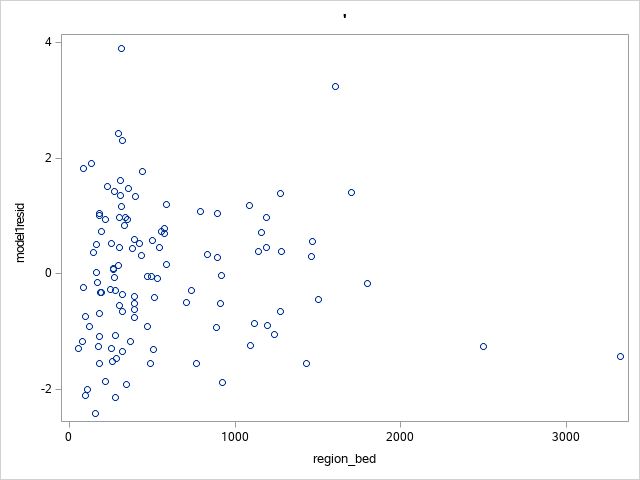

In [15]:
proc sgplot data=q4_b;
  scatter x=region_bed y=model1resid;
run;


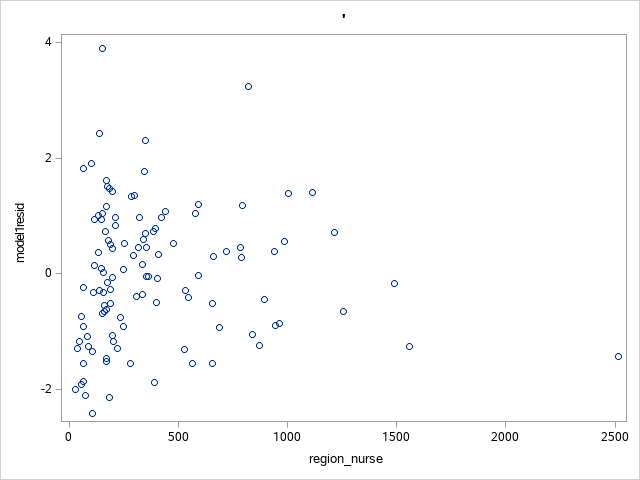

In [18]:
proc sgplot data=q4_b;
  scatter x=region_nurse y=model1resid;
run;


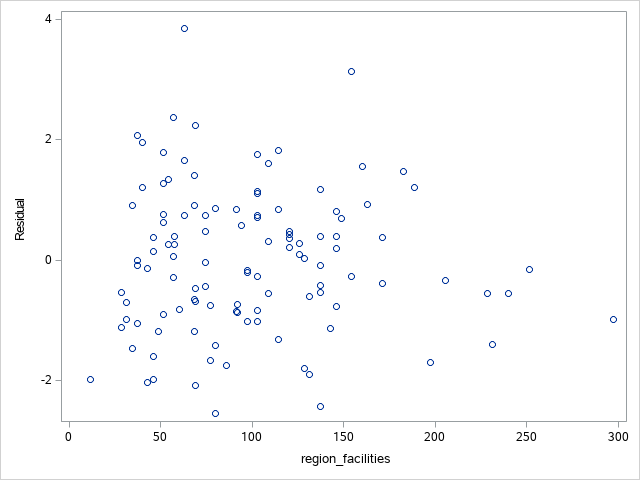

In [62]:
proc sgplot data=q4_2;
  scatter x=region_facilities y=model1resid;
run;


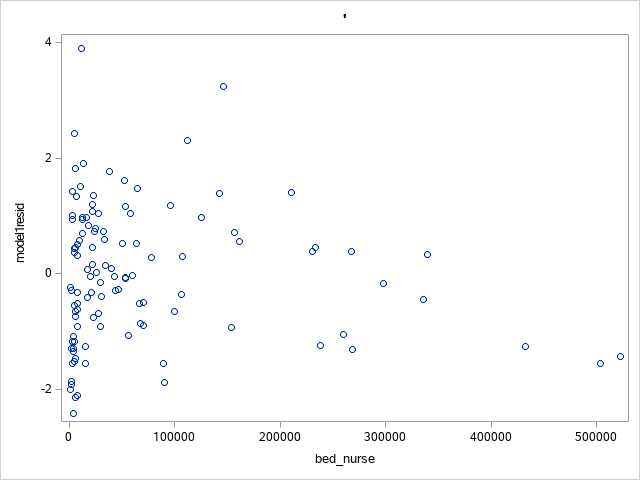

In [19]:
proc sgplot data=q4_b;
  scatter x=bed_nurse y=model1resid;
run;


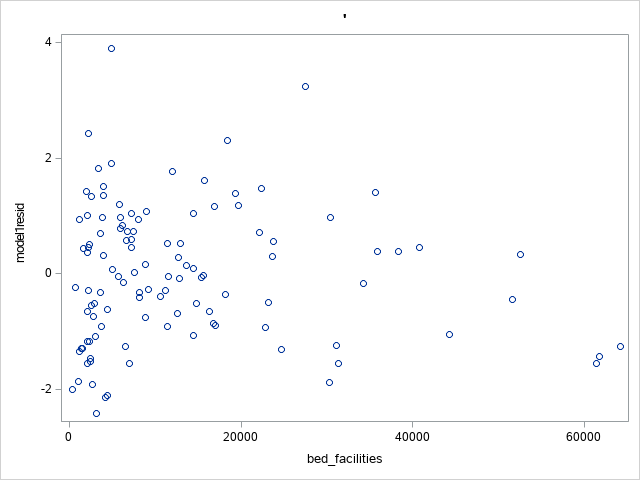

In [20]:
proc sgplot data=q4_b;
  scatter x=bed_facilities y=model1resid;
run;


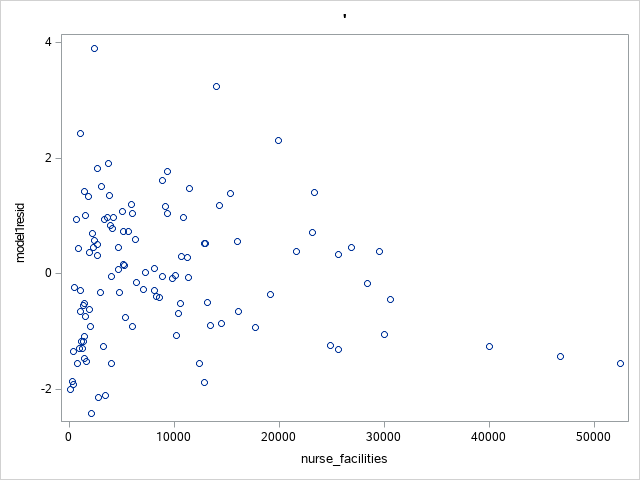

In [21]:
proc sgplot data=q4_b;
  scatter x=nurse_facilities y=model1resid;
run;


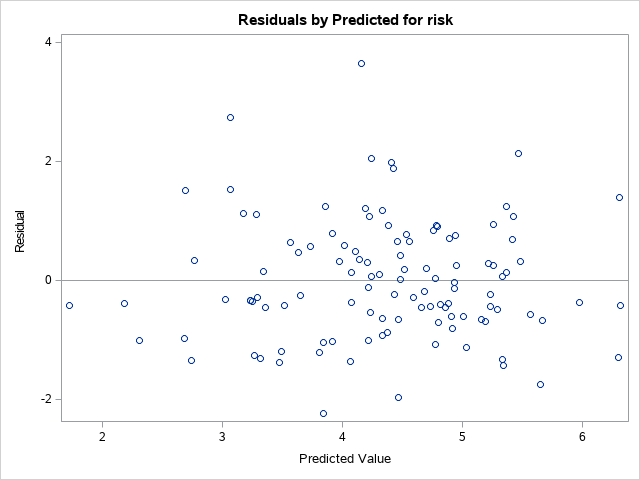
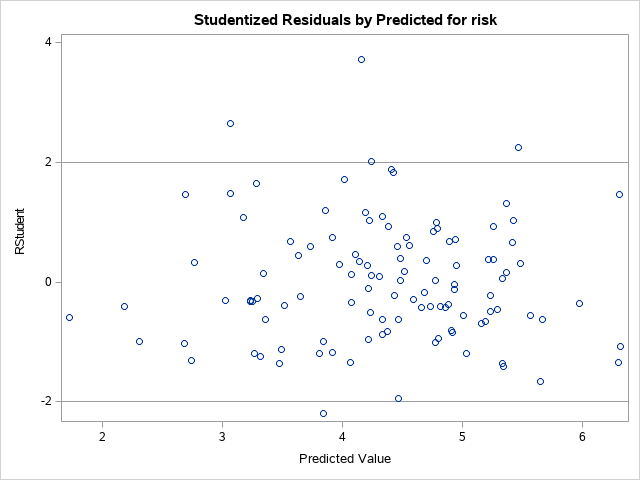
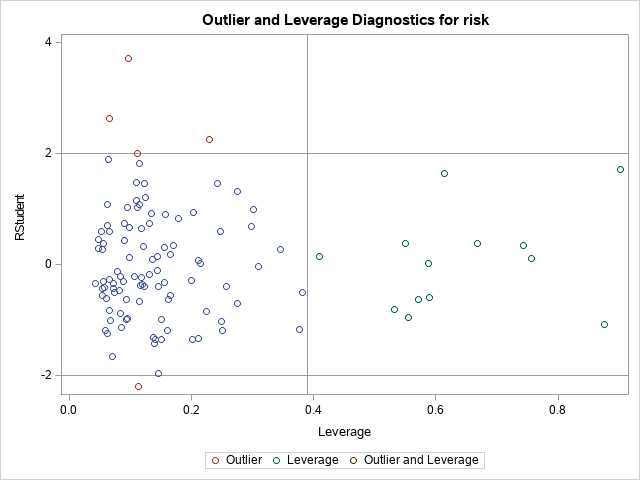
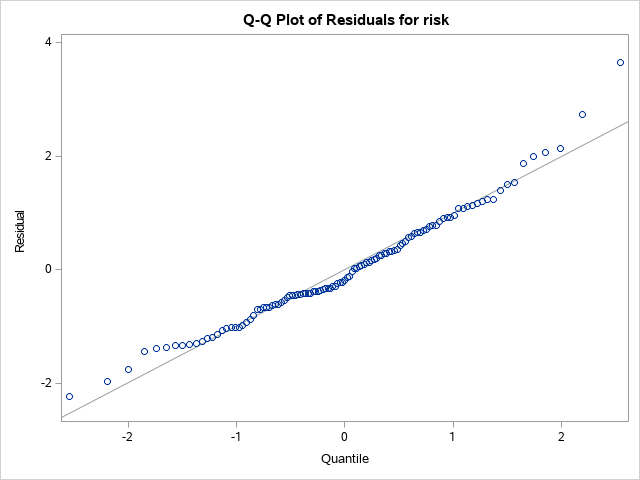
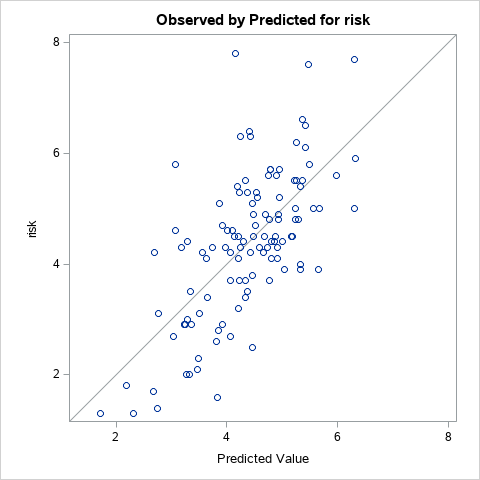
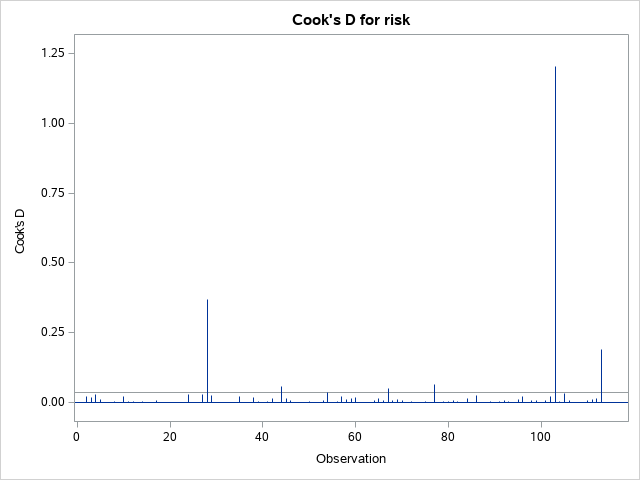
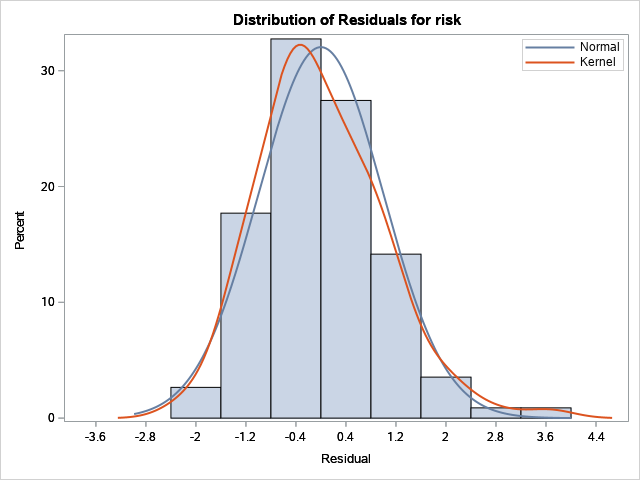
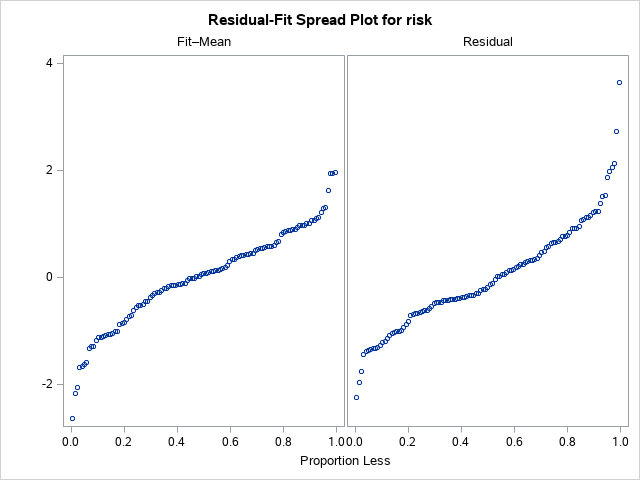

In [26]:
ods html file="new-q4-c.html";
title "full second-order model of question 4";
proc glm data=q4_b PLOTS(UNPACK)=DIAGNOSTICS;
   class region;
   model 
   risk = region bed nurses facilities 
   bed2 nurse2 facilities2 
   region*bed region*nurses region*facilities 
   bed_nurse bed_facilities nurse_facilities /solution clparm;
run;
title "";


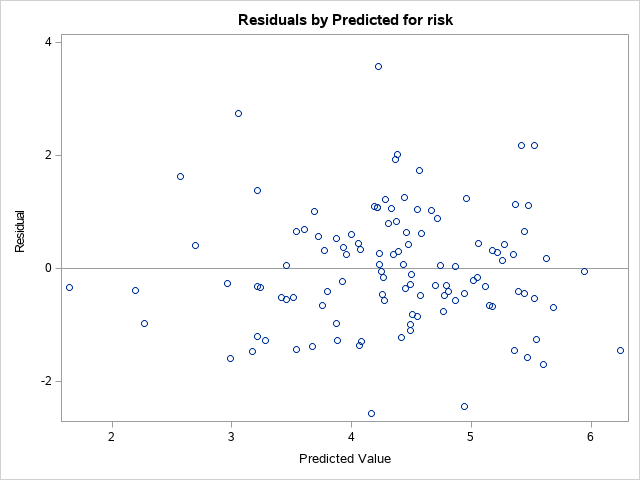
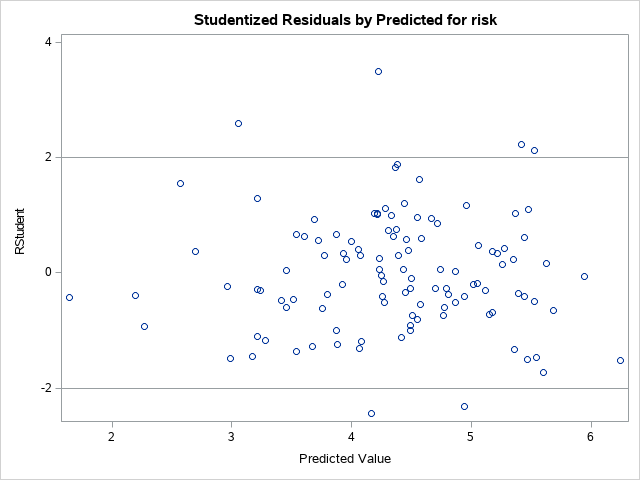
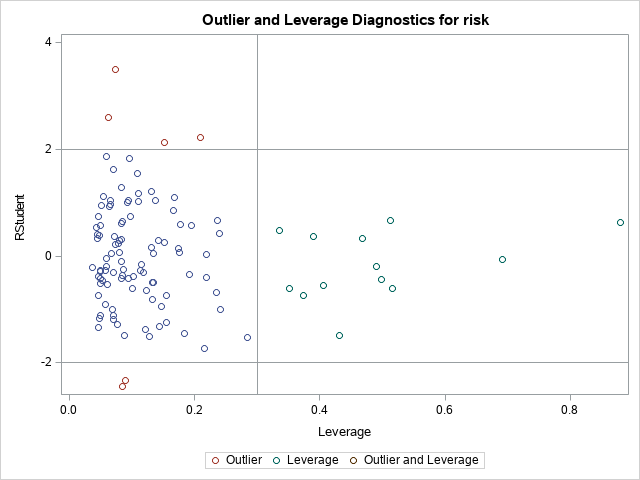
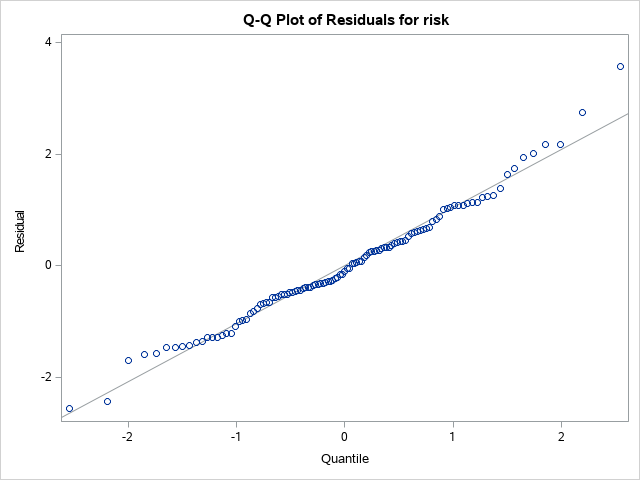
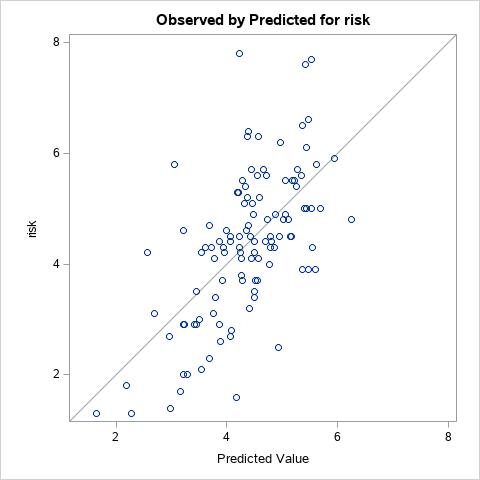
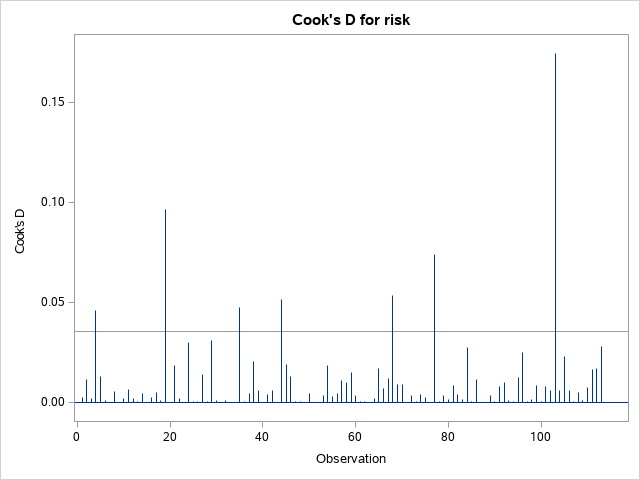
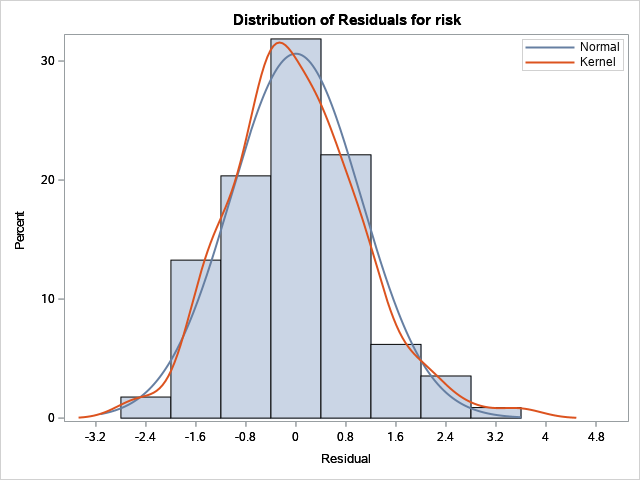
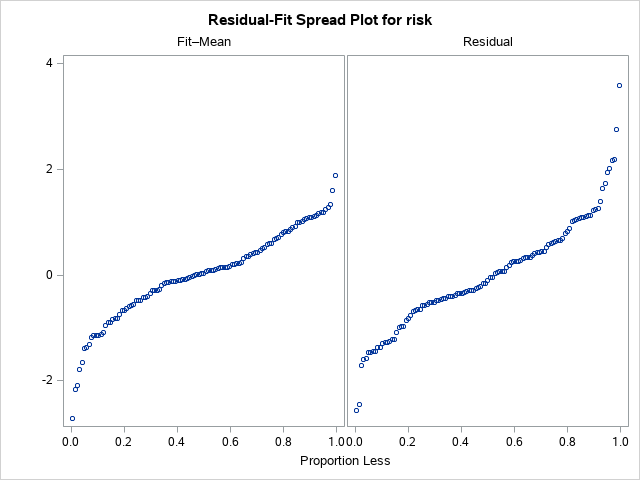

In [27]:
ods html file="new-q4-final.html";
title "my reported model of question 4";
proc glm data=q4_b plots(unpack)=diagnostics;
  class region;
  model risk = region bed nurses facilities facilities2 
      region*bed region*nurses region*facilities /solution clparm;
run;
title "";

In [94]:
proc print data=q4;
run;

Obs,V1,V2,V3,risk,V5,V6,bed,V8,region,V10,nurses,facilities
1,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
6,6,9.76,50.9,5.1,21.9,97.0,150,2,2,147,106,40.0
7,7,9.68,57.8,4.6,16.7,79.0,186,2,3,151,129,40.0
8,8,11.18,45.7,5.4,60.5,85.8,640,1,2,399,360,60.0
9,9,8.67,48.2,4.3,24.4,90.8,182,2,3,130,118,40.0
10,10,8.84,56.3,6.3,29.6,82.6,85,2,1,59,66,40.0
